## Fancy markdown stuff

In [1]:
import ast
import random
import pickle
import json

import pandas as pd
import numpy as np
from numpy.linalg.linalg import LinAlgError
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'  # https://stackoverflow.com/questions/34387893/output-matplotlib-figure-to-svg-with-text-as-text-not-curves
from matplotlib_venn import venn2, venn3, venn3_circles
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import fdrcorrection
import dateutil
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2

# More markdow stuff

In [2]:
animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired',
                            1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)
df = pd.read_csv(r'..\data\processed\combined_metab_lipid_table.csv', index_col=0)
data_cols = df.filter(regex='FBG|RBG').columns
pval_cols = df.filter(regex='pval').columns

In [4]:
# Generate data labels (y) for estimator 

y_continuous = fg.set_index('combined_col_name')['bg']

y = fg.set_index('combined_col_name')[['glucose_tolerance']]
# y['glucose_tolerance'] = y['glucose_tolerance'].map({'normal': 0, 'impaired': 1, 'diabetic': 2})
# display(y)
# y_dummies = pd.get_dummies(y, drop_first=True)
# y_dummies

# Other markdown sub-slide

In [27]:
X_all = StandardScaler().fit_transform(df[data_cols].T)

X_only_conv = StandardScaler().fit_transform(df.loc[~df[pval_cols].isna().all(axis=1), data_cols].T)

gluc_tol_cols = ['fdr corrected pval effect of glucose tolerance', 
                 'fdr corrected pval effect of interaction sampling and glucose tolerance']
X_only_signf = StandardScaler().fit_transform(df.loc[(df[gluc_tol_cols] < 0.05).any(axis=1), data_cols].T)
# X_only_signf

In [48]:
sm_ols = sm.OLS(exog=X_only_signf, endog=y_continuous)
sm_fit = sm_ols.fit_regularized(L1_wt=0.5, maxiter=10000)

(array([  1.,   1.,  34., 389.,  21.,   2.,   0.,   0.,   0.,   1.]),
 array([-39.17218804, -27.70127647, -16.23036489,  -4.75945332,
          6.71145826,  18.18236984,  29.65328141,  41.12419299,
         52.59510456,  64.06601614,  75.53692771]),
 <BarContainer object of 10 artists>)

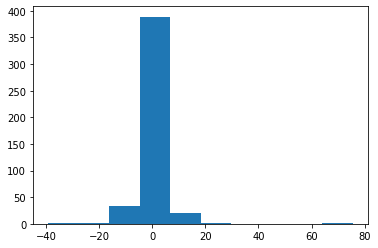

In [52]:
plt.hist(sm_fit.params)

In [49]:
sm_fit.converged

True

Text(0.5, 1.0, 'Ordinary least squares')

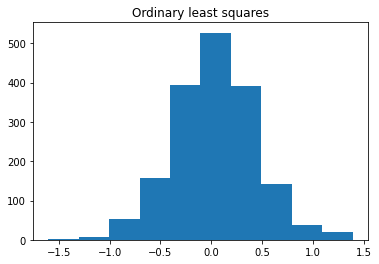

In [32]:
ols = LinearRegression()
olsfit = ols.fit(X=X, y=y_continuous)
plt.hist(olsfit.coef_)
plt.title('Ordinary least squares')

Text(0.5, 1.0, 'Elastic net (0.5)')

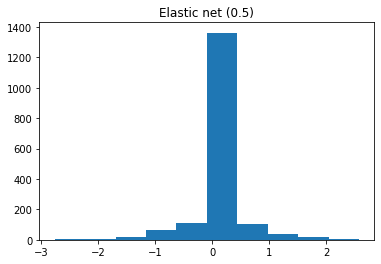

In [251]:
en = ElasticNet(tol=1e-4, max_iter=20000)
fit = en.fit(X=X, y=y_continuous, )
plt.hist(fit.coef_)
plt.title('Elastic net (0.5)')

In [ ]:
en.

In [244]:
# enc --> "Elastic Net Coefficients"
enc = pd.DataFrame([en.coef_, df.index]).T
enc.columns = ['coef', 'metab']
enc.loc[enc['coef'].abs() > 1.3].sort_values('coef', ascending=False)

,coef,metab
945,2.5708,unknown_774.5647_7.996
1172,2.15701,unknown_824.55579_9.735
1415,2.02675,TG_18:1_20:5_20:5_942.75476_14.365
293,2.01485,unknown_401.07464_11.572
509,2.00205,unknown_310.2351_11.468
365,1.93822,unknown_85.02841_11.562
270,1.92423,unknown_143.03392_11.579
142,1.85757,unknown_113.02329_11.561
351,1.81351,unknown_140.06824_11.512
627,1.76579,unknown_239.07651_11.564


Text(0.5, 1.0, 'Lasso (L1) least squares')

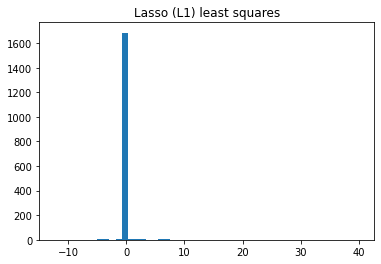

In [246]:
lasso = ElasticNet(tol=1e-4, max_iter=20000, l1_ratio=1)
lassofit = lasso.fit(X=X, y=y_continuous, )
plt.hist(lassofit.coef_, bins=50)
plt.title('Lasso (L1) least squares')

In [249]:
pd.DataFrame(lassofit.coef_).sort_values(0)

,0
417,-12.323030
504,-10.251683
34,-8.744570
930,-7.049098
856,-6.547535
...,...
1415,7.261928
509,7.729036
1163,8.445303
1308,11.599671


Text(0.5, 1.0, 'Ridge (L2) least squares')

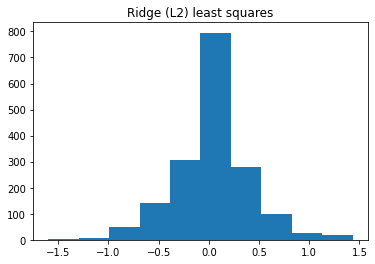

In [250]:
ridge = ElasticNet(tol=1e-4, max_iter=100000, l1_ratio=0.1)
# pure Ridge (L1 = 0) doesn't converge even for 100k iterations. 
ridgefit = ridge.fit(X=X, y=y_continuous, )
plt.hist(ridgefit.coef_)
plt.title('Ridge (L2) least squares')

In [234]:
encv = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99], 
                    max_iter=20000)
# encvfit = encv.fit(X=X, y=y_continuous)

In [235]:
encv.path(X=X, y=y_continuous)

C:\Users\ben\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.792e+02, tolerance: 1.918e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\ben\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.653e+02, tolerance: 1.918e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\ben\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

C:\Users\ben\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.967e+03, tolerance: 1.918e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\ben\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.440e+03, tolerance: 1.918e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\ben\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regu

(array([8.51325147e+03, 7.93948682e+03, 7.40439198e+03, 6.90536074e+03,
        6.43996254e+03, 6.00593062e+03, 5.60115099e+03, 5.22365216e+03,
        4.87159549e+03, 4.54326626e+03, 4.23706532e+03, 3.95150130e+03,
        3.68518334e+03, 3.43681431e+03, 3.20518453e+03, 2.98916582e+03,
        2.78770605e+03, 2.59982399e+03, 2.42460456e+03, 2.26119432e+03,
        2.10879739e+03, 1.96667151e+03, 1.83412443e+03, 1.71051058e+03,
        1.59522789e+03, 1.48771487e+03, 1.38744787e+03, 1.29393853e+03,
        1.20673140e+03, 1.12540174e+03, 1.04955343e+03, 9.78817044e+02,
        9.12848051e+02, 8.51325147e+02, 7.93948682e+02, 7.40439198e+02,
        6.90536074e+02, 6.43996254e+02, 6.00593062e+02, 5.60115099e+02,
        5.22365216e+02, 4.87159549e+02, 4.54326626e+02, 4.23706532e+02,
        3.95150130e+02, 3.68518334e+02, 3.43681431e+02, 3.20518453e+02,
        2.98916582e+02, 2.78770605e+02, 2.59982399e+02, 2.42460456e+02,
        2.26119432e+02, 2.10879739e+02, 1.96667151e+02, 1.834124

In [219]:
encvfit.l1_ratio_

0.97

In [231]:
encvfit.mse_path_[:, :, 0][1]

array([6690.93602217, 6679.39142557, 6665.88990329, 6643.50632983,
       6614.38380174, 6574.5320175 , 6522.54823997, 6450.02134406,
       6358.72695632, 6252.87792696, 6133.34325218, 6005.92695056,
       5871.38389597, 5730.04441561, 5585.50029011, 5438.74528325,
       5290.60933044, 5144.96250868, 5004.96485673, 4872.59480039,
       4748.20977747, 4631.85147147, 4525.14339217, 4426.01255739,
       4334.80918665, 4250.83215423, 4175.66958984, 4108.50549982,
       4049.03968133, 3997.17025872, 3952.20677469, 3913.61093052,
       3877.74581235, 3844.76344463, 3815.60331939, 3790.39933817,
       3767.07132387, 3748.70812882, 3731.77628414, 3716.73344257,
       3703.85518207, 3692.04714773, 3679.96462114, 3668.92228602,
       3657.08534688, 3645.58976737, 3634.00482797, 3622.82733039,
       3611.6375193 , 3600.96835192, 3591.08197011, 3580.95290395,
       3570.63385201, 3560.96158035, 3551.65700148, 3543.5575839 ,
       3537.29235528, 3531.99891242, 3527.13878366, 3523.95789

In [39]:
exog = fg.set_index('combined_col_name')['glucose_tolerance']
exog

combined_col_name
1076_10_FBG    diabetic
1062_8_FBG     impaired
1093_9_FBG       normal
1060_8_RBG     impaired
1091_10_FBG      normal
1092_9_RBG     impaired
1093_10_RBG      normal
1082_10_FBG    diabetic
1060_9_RBG     impaired
1101_9_FBG     diabetic
1062_10_RBG    impaired
1091_8_RBG       normal
1074_10_FBG    impaired
1101_10_RBG    diabetic
1076_9_FBG     diabetic
1092_9_FBG     impaired
1074_8_FBG     impaired
1091_10_RBG      normal
1082_9_FBG     diabetic
1076_8_RBG     diabetic
1060_8_FBG     impaired
1093_9_RBG       normal
1060_10_FBG    impaired
1082_10_RBG    diabetic
1074_9_RBG     impaired
1091_9_RBG       normal
1101_10_FBG    diabetic
1093_8_FBG       normal
1074_8_RBG     impaired
1102_10_RBG    impaired
1062_9_FBG     impaired
1076_9_RBG     diabetic
1092_8_FBG     impaired
1062_10_FBG    impaired
1102_8_RBG     impaired
1074_10_RBG    impaired
1060_9_FBG     impaired
1082_9_RBG     diabetic
1076_10_RBG    diabetic
1091_9_FBG       normal
1102_9_FBG     impaire

In [135]:
pd.get_dummies(exog, drop_first=True)

,impaired,normal
combined_col_name,,
1076_10_FBG,0,0
1062_8_FBG,1,0
1093_9_FBG,0,1
1060_8_RBG,1,0
1091_10_FBG,0,1
1092_9_RBG,1,0
1093_10_RBG,0,1
1082_10_FBG,0,0
1060_9_RBG,1,0


In [36]:
endog = df.set_index('i')[data_cols].T

In [37]:
abbrev_cols = endog.columns

In [40]:
endog.join(exog)

,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,...,l_1020,l_1021,l_1022,l_1023,l_1024,l_1025,l_1026,l_1027,l_1028,glucose_tolerance
1076_10_FBG,29.163795,30.152274,29.735454,29.701370,26.700629,28.721319,29.803012,29.047350,28.892166,27.170732,...,18.378388,18.336840,18.447194,16.419472,18.897008,16.810111,17.724121,18.400646,16.655211,diabetic
1062_8_FBG,30.572489,30.703658,29.569621,30.641931,21.774699,27.427681,30.349551,28.813080,28.671019,26.901321,...,17.166214,17.882779,19.507955,17.567143,19.348489,17.364343,19.240306,18.585339,16.313637,impaired
1093_9_FBG,29.753802,30.603359,30.043032,30.624242,27.051667,28.906704,30.228474,29.137348,28.609728,26.578356,...,21.175953,20.788956,21.407793,21.111930,21.529536,20.099612,21.430516,20.968101,19.339229,normal
1060_8_RBG,30.610134,29.309067,29.827946,28.459047,17.431244,29.295561,29.113441,28.848762,28.995708,22.512901,...,20.310682,19.423127,20.589383,18.430226,17.921098,18.430542,17.488155,16.202162,17.985491,impaired
1091_10_FBG,30.700893,30.505310,29.420633,30.636897,27.163433,28.470314,30.188475,28.977544,28.105805,26.149719,...,17.710758,18.448910,19.899861,18.266873,20.133479,17.986741,19.996615,19.778245,17.357845,normal
1092_9_RBG,30.577914,29.114748,29.483693,28.588431,25.867137,29.644309,29.046819,28.993620,28.339876,22.618105,...,18.375462,18.748319,19.968825,18.419951,17.824376,18.099621,17.383197,15.556400,17.582655,impaired
1093_10_RBG,30.656929,29.416945,29.886091,28.685024,26.188412,29.792770,29.130352,29.043613,28.603652,22.397004,...,18.989137,19.227975,20.089886,18.323302,18.836779,18.145468,18.282680,16.603878,17.887551,normal
1082_10_FBG,30.604336,30.081204,29.609038,30.257619,26.977695,28.204534,29.891213,28.981538,28.704319,27.005622,...,16.566651,15.513664,18.843156,15.364329,19.255315,14.496938,19.507853,19.379093,13.846921,diabetic
1060_9_RBG,30.996475,29.431175,30.018239,28.625995,26.312933,30.211206,29.212933,29.416956,29.331185,22.829664,...,19.661018,19.568500,20.581856,18.948519,18.261890,18.854601,17.718258,16.494586,18.466842,impaired
1101_9_FBG,30.672859,30.044828,29.620839,29.974868,26.709748,28.574011,29.729036,29.041379,28.488075,26.715388,...,19.419490,19.099508,20.166937,19.286479,19.685160,18.324624,19.526233,18.844052,17.739443,diabetic


In [91]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = np.dot(X, beta) + e

X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01010101e-01, 1.02030405e-02],
       [1.00000000e+00, 2.02020202e-01, 4.08121620e-02],
       [1.00000000e+00, 3.03030303e-01, 9.18273646e-02],
       [1.00000000e+00, 4.04040404e-01, 1.63248648e-01],
       [1.00000000e+00, 5.05050505e-01, 2.55076013e-01],
       [1.00000000e+00, 6.06060606e-01, 3.67309458e-01],
       [1.00000000e+00, 7.07070707e-01, 4.99948985e-01],
       [1.00000000e+00, 8.08080808e-01, 6.52994592e-01],
       [1.00000000e+00, 9.09090909e-01, 8.26446281e-01],
       [1.00000000e+00, 1.01010101e+00, 1.02030405e+00],
       [1.00000000e+00, 1.11111111e+00, 1.23456790e+00],
       [1.00000000e+00, 1.21212121e+00, 1.46923783e+00],
       [1.00000000e+00, 1.31313131e+00, 1.72431385e+00],
       [1.00000000e+00, 1.41414141e+00, 1.99979594e+00],
       [1.00000000e+00, 1.51515152e+00, 2.29568411e+00],
       [1.00000000e+00, 1.61616162e+00, 2.61197837e+00],
       [1.00000000e+00, 1.71717

In [92]:
exog.values.reshape(1, -1)

array([['diabetic', 'impaired', 'normal', 'impaired', 'normal',
        'impaired', 'normal', 'diabetic', 'impaired', 'diabetic',
        'impaired', 'normal', 'impaired', 'diabetic', 'diabetic',
        'impaired', 'impaired', 'normal', 'diabetic', 'diabetic',
        'impaired', 'normal', 'impaired', 'diabetic', 'impaired',
        'normal', 'diabetic', 'normal', 'impaired', 'impaired',
        'impaired', 'diabetic', 'impaired', 'impaired', 'impaired',
        'impaired', 'impaired', 'diabetic', 'diabetic', 'normal',
        'impaired', 'impaired', 'normal', 'diabetic', 'impaired',
        'diabetic', 'impaired', 'diabetic', 'diabetic', 'normal',
        'impaired', 'diabetic', 'impaired', 'impaired', 'normal',
        'impaired', 'impaired', 'diabetic', 'impaired', 'impaired']],
      dtype=object)

In [76]:
np.asarray(exog)

array(['diabetic', 'impaired', 'normal', 'impaired', 'normal', 'impaired',
       'normal', 'diabetic', 'impaired', 'diabetic', 'impaired', 'normal',
       'impaired', 'diabetic', 'diabetic', 'impaired', 'impaired',
       'normal', 'diabetic', 'diabetic', 'impaired', 'normal', 'impaired',
       'diabetic', 'impaired', 'normal', 'diabetic', 'normal', 'impaired',
       'impaired', 'impaired', 'diabetic', 'impaired', 'impaired',
       'impaired', 'impaired', 'impaired', 'diabetic', 'diabetic',
       'normal', 'impaired', 'impaired', 'normal', 'diabetic', 'impaired',
       'diabetic', 'impaired', 'diabetic', 'diabetic', 'normal',
       'impaired', 'diabetic', 'impaired', 'impaired', 'normal',
       'impaired', 'impaired', 'diabetic', 'impaired', 'impaired'],
      dtype=object)

In [133]:
en = sm.OLS(endog=endog, exog=exog.values.reshape(1, -1)).fit_regularized(L1_wt=0.5)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [126]:
formula

'C(glucose_tolerance) ~ m_0 + m_1 + m_2 + m_3 + m_4 + m_5 + m_6 + m_7 + m_8 + m_9 + m_10 + m_11 + m_12 + m_13 + m_14 + m_15 + m_16 + m_17 + m_18 + m_19 + m_20 + m_21 + m_22 + m_23 + m_24 + m_25 + m_26 + m_27 + m_28 + m_29 + m_30 + m_31 + m_32 + m_33 + m_34 + m_35 + m_36 + m_37 + m_38 + m_39 + m_40 + m_41 + m_42 + m_43 + m_44 + m_45 + m_46 + m_47 + m_48 + m_49 + m_50 + m_51 + m_52 + m_53 + m_54 + m_55 + m_56 + m_57 + m_58 + m_59 + m_60 + m_61 + m_62 + m_63 + m_64 + m_65 + m_66 + m_67 + m_68 + m_69 + m_70 + m_71 + m_72 + m_73 + m_74 + m_75 + m_76 + m_77 + m_78 + m_79 + m_80 + m_81 + m_82 + m_83 + m_84 + m_85 + m_86 + m_87 + m_88 + m_89 + m_90 + m_91 + m_92 + m_93 + m_94 + m_95 + m_96 + m_97 + m_98 + m_99 + m_100 + m_101 + m_102 + m_103 + m_104 + m_105 + m_106 + m_107 + m_108 + m_109 + m_110 + m_111 + m_112 + m_113 + m_114 + m_115 + m_116 + m_117 + m_118 + m_119 + m_120 + m_121 + m_122 + m_123 + m_124 + m_125 + m_126 + m_127 + m_128 + m_129 + m_130 + m_131 + m_132 + m_133 + m_134 + m_135 

In [132]:
formula = "glucose_tolerance ~ "  # +  "m_0 + m_1 + m_2"
for metab in abbrev_cols:
    formula += str(metab) + ' + '
formula = formula[:-10001]

en = smf.ols(formula=formula, data=endog.join(exog)).fit_regularized(L1_wt=0.5)    #.fit_regularized(L1_wt=0.5)   # family=sm.families.Binomial()

ValueError: operands could not be broadcast together with shapes (60,3) (60,) 

In [130]:
en.params

,0,1,2
Intercept,0.000119,0.000124,-0.000227
m_0,-0.017162,0.038187,-0.020692
m_1,0.005176,-0.016022,0.010952
m_2,0.013673,-0.024380,0.010827
m_3,-0.005658,0.002565,0.003223
...,...,...,...
m_467,-0.001520,0.003442,-0.001674
m_468,-0.021120,0.015158,0.006099
m_469,-0.004062,0.006839,-0.002654
m_470,0.025943,-0.041180,0.015440


In [25]:
sm_en = sm.OLS.

AttributeError: 'NoneType' object has no attribute 'shape'

In [5]:
smf.ols()

<module 'statsmodels.formula.api' from 'C:\\Users\\ben\\Anaconda3\\lib\\site-packages\\statsmodels\\formula\\api.py'>